# Handle Categorical Missing Values

# Frequent Category Imputation

In [30]:
import pandas as pd
df =pd.read_csv('/home/webtunix/Downloads/housing_data_with_imputed_LotFrontage.csv', usecols = ['BsmtQual','GarageType', 'FireplaceQu', 'SalePrice'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     2838 non-null   object
 1   FireplaceQu  1499 non-null   object
 2   GarageType   2762 non-null   object
 3   SalePrice    2919 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 91.3+ KB


In [32]:
from numpy import int64

df['SalePrice'] = df['SalePrice'].astype(int64)
df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,313000
1,Gd,TA,Attchd,2384000
2,Gd,TA,Attchd,342000
3,TA,Gd,Detchd,420000
4,Gd,TA,Attchd,498000


In [33]:
df.to_csv("house_price_data.csv")

In [34]:
df.isnull().sum()


BsmtQual         81
FireplaceQu    1420
GarageType      157
SalePrice         0
dtype: int64

In [35]:
df.isnull().mean()


BsmtQual       0.027749
FireplaceQu    0.486468
GarageType     0.053786
SalePrice      0.000000
dtype: float64

In [36]:
df.isnull().mean().sort_values(ascending = True)


SalePrice      0.000000
BsmtQual       0.027749
GarageType     0.053786
FireplaceQu    0.486468
dtype: float64

# Compute the Frequency with Every Feature


<AxesSubplot:>

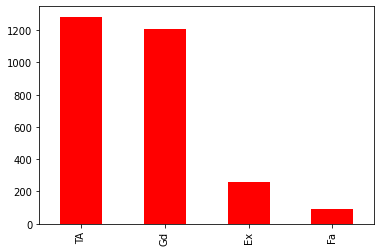

In [37]:
df['BsmtQual'].value_counts().plot.bar(color = "red")


<AxesSubplot:xlabel='BsmtQual'>

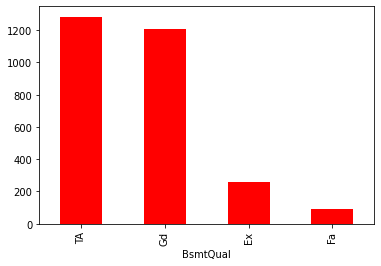

In [38]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False).plot.bar(color = "red")

<AxesSubplot:xlabel='GarageType'>

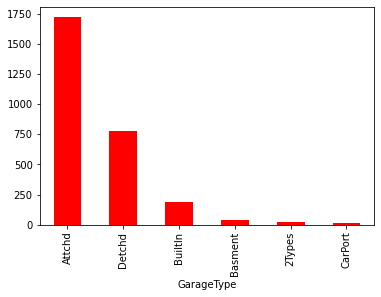

In [39]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending = False).plot.bar(color = "red")


<AxesSubplot:xlabel='FireplaceQu'>

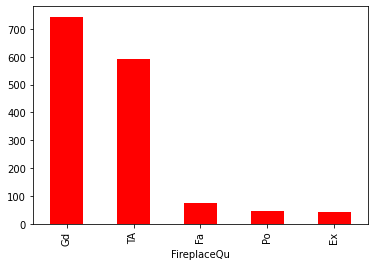

In [40]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending = False).plot.bar(color = "red")


In [41]:
df['GarageType'].value_counts().index[0]


'Attchd'

In [42]:
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace = True)

In [43]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [44]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

# Advantages

# Disadvantages

# Adding a variable to capture NAN

In [45]:
df =pd.read_csv('/home/webtunix/Downloads/housing_data_with_imputed_LotFrontage.csv', usecols = ['BsmtQual','GarageType', 'FireplaceQu', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,313000
1,Gd,TA,Attchd,2384000
2,Gd,TA,Attchd,342000
3,TA,Gd,Detchd,420000
4,Gd,TA,Attchd,498000


In [46]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)


In [47]:
df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,313000,0
1,Gd,TA,Attchd,2384000,0
2,Gd,TA,Attchd,342000,0
3,TA,Gd,Detchd,420000,0
4,Gd,TA,Attchd,498000,0


In [48]:
frequent = df['BsmtQual'].mode()[0]


In [49]:
df['BsmtQual'].fillna(frequent,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,313000,0
1,Gd,TA,Attchd,2384000,0
2,Gd,TA,Attchd,342000,0
3,TA,Gd,Detchd,420000,0
4,Gd,TA,Attchd,498000,0


In [50]:
df['FireplaceQu_Var'] = np.where(df['FireplaceQu'].isnull(), 1, 0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace = True)

In [51]:
df.head(10)


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,313000,0,1
1,Gd,TA,Attchd,2384000,0,0
2,Gd,TA,Attchd,342000,0,0
3,TA,Gd,Detchd,420000,0,0
4,Gd,TA,Attchd,498000,0,0
5,Gd,Gd,Attchd,490000,0,1
6,Ex,Gd,Attchd,335000,0,0
7,Gd,TA,Attchd,482000,0,0
8,TA,TA,Detchd,452500,0,0
9,TA,TA,Attchd,640000,0,0


# Suppose if you have more frequent catgories, we replace NAN with a new category


In [52]:
df =pd.read_csv('/home/webtunix/Downloads/housing_data_with_imputed_LotFrontage.csv', usecols = ['BsmtQual','GarageType', 'FireplaceQu', 'SalePrice'])

In [53]:
df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,313000
1,Gd,TA,Attchd,2384000
2,Gd,TA,Attchd,342000
3,TA,Gd,Detchd,420000
4,Gd,TA,Attchd,498000


In [54]:
def impute_nan(df, variable):
    df[variable+'newvar']= np.where(df[variable].isnull(),'Missing', df[variable])
    

In [55]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df, feature)

In [56]:
df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,313000,Gd,Missing,Attchd
1,Gd,TA,Attchd,2384000,Gd,TA,Attchd
2,Gd,TA,Attchd,342000,Gd,TA,Attchd
3,TA,Gd,Detchd,420000,TA,Gd,Detchd
4,Gd,TA,Attchd,498000,Gd,TA,Attchd


In [57]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)


In [58]:
df.head()


,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,313000,Gd,Missing,Attchd
1,2384000,Gd,TA,Attchd
2,342000,Gd,TA,Attchd
3,420000,TA,Gd,Detchd
4,498000,Gd,TA,Attchd
